In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier#, plot_
#from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
#Loading your dataset
data = pd.read_csv("C:/Users/luengoag/Desktop/Private/Python/breast_cancer/breast_cancer.csv")

In [5]:
#Reviewing the dataset
data.shape

(569, 33)

In [6]:
data.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
#Removing extra column with Null values
data = data.drop(columns='Unnamed: 32',axis='columns')

In [10]:
#Encoding the diagnosis column to be used as a numeric variable.
le = LabelEncoder()

psd_data = data.copy().drop(columns='diagnosis', axis="columns")
psd_data['diagnosis'] = le.fit_transform(data['diagnosis'])

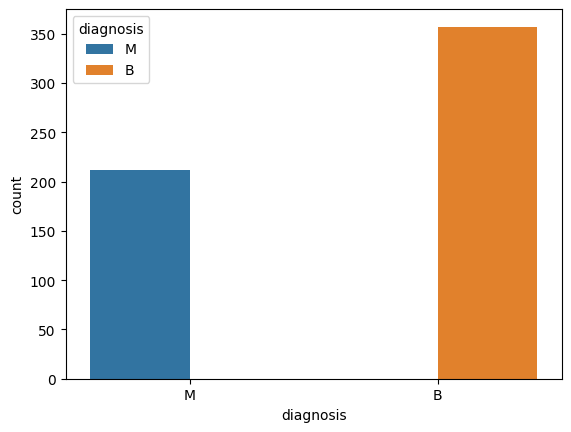

In [11]:
#Checking distribution of Malicious and Benign samples
sns.countplot(data=data, x='diagnosis', hue='diagnosis')
plt.show()

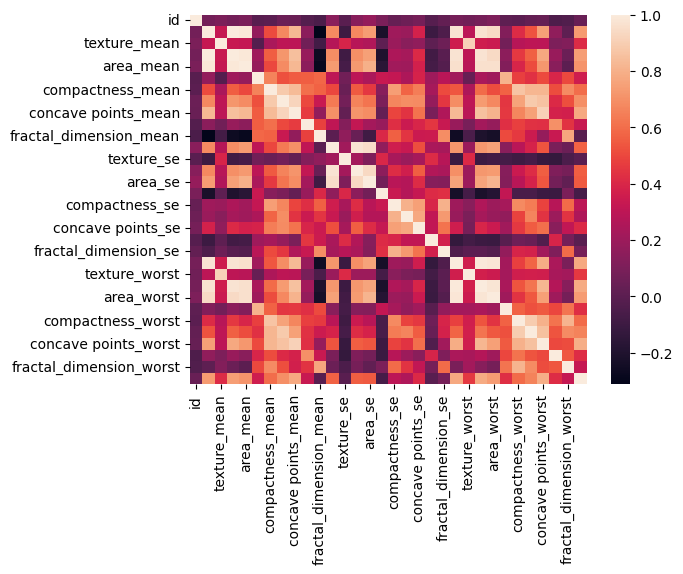

In [12]:
#Reviewing correlation between variables
correlation = psd_data.corr()

sns.heatmap(data=correlation)
plt.show()

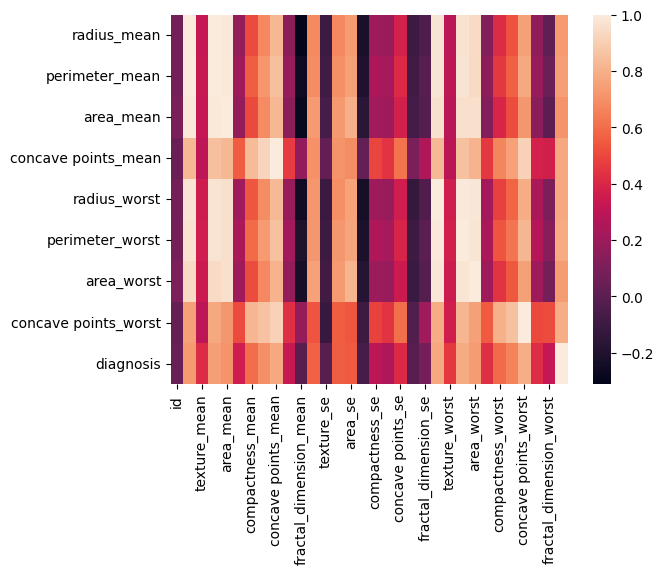

In [13]:
#extracting the variables with the highest correlation
corr_data = pd.DataFrame(correlation)
high_corr = corr_data[corr_data['diagnosis']*100 > 70]

sns.heatmap(data=high_corr)
plt.show()

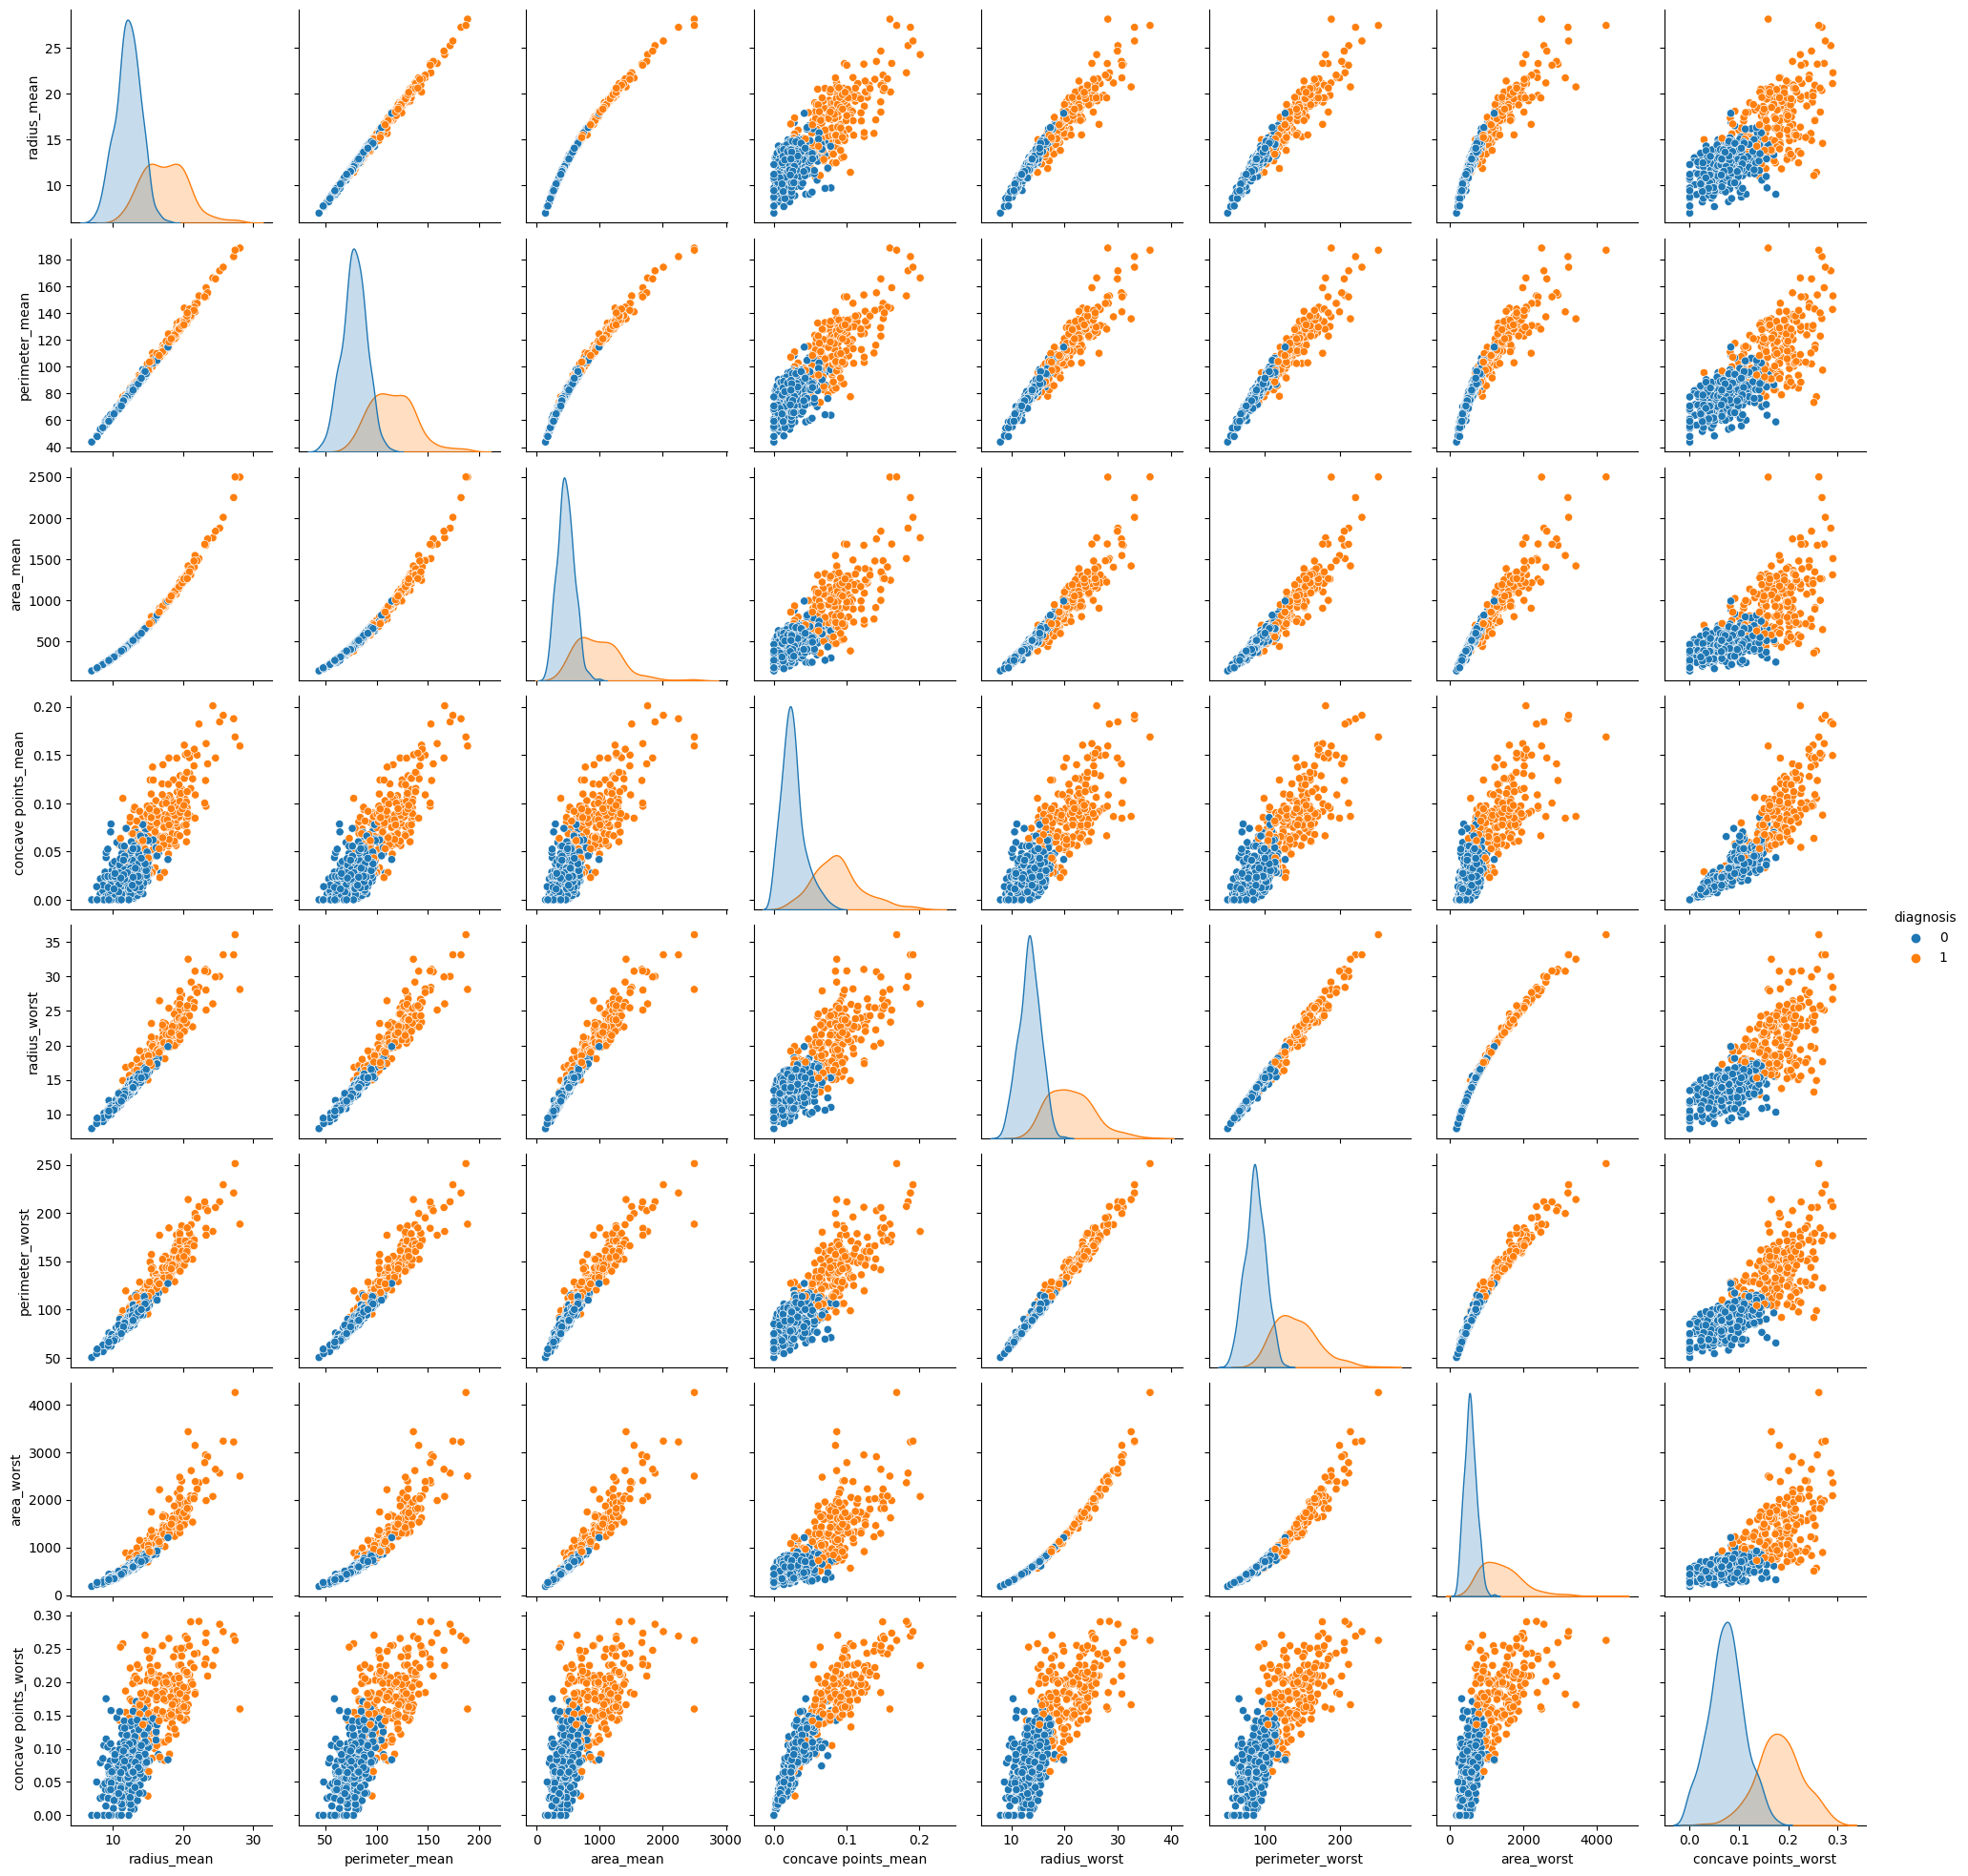

In [14]:
high_corr_psd_data = psd_data[['diagnosis','radius_mean','perimeter_mean','area_mean','concave points_mean','radius_worst','perimeter_worst', 'area_worst', 'concave points_worst']]

#Plotting general view of the data
sns.pairplot(data=high_corr_psd_data,hue='diagnosis')
plt.show()

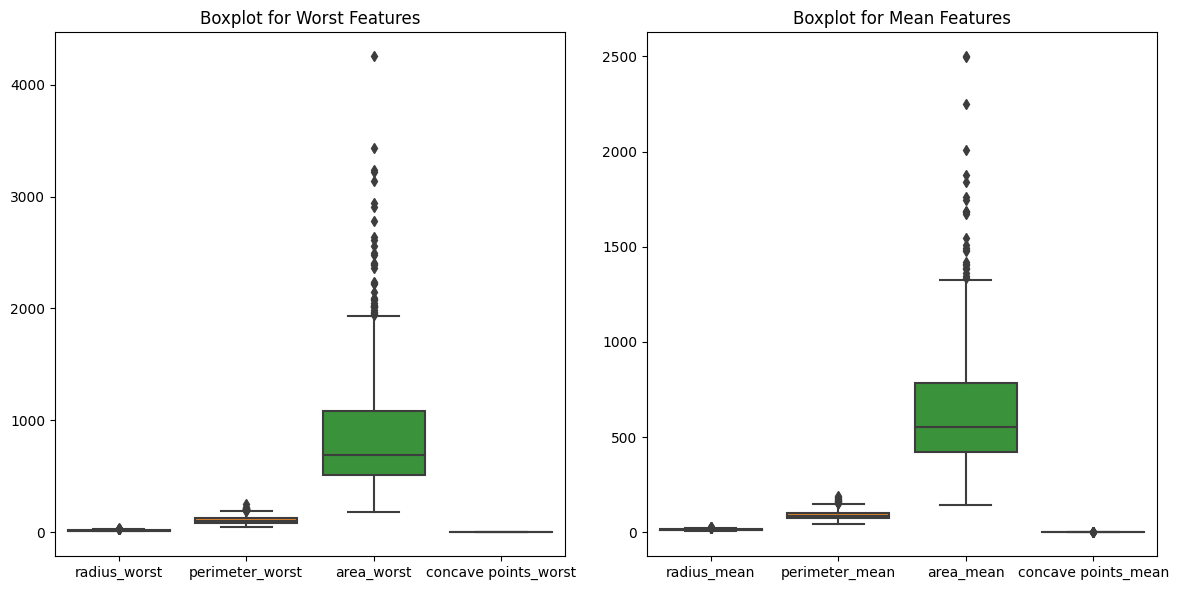

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the first boxplot on the first subplot
sns.boxplot(data=high_corr_psd_data[['radius_worst','perimeter_worst', 'area_worst', 'concave points_worst']], ax=axes[0])
axes[0].set_title('Boxplot for Worst Features')

# Plot the second boxplot on the second subplot
sns.boxplot(data=high_corr_psd_data[['radius_mean','perimeter_mean','area_mean','concave points_mean']], ax=axes[1])
axes[1].set_title('Boxplot for Mean Features')

# Adjust layout to prevent overlap
plt.tight_layout()

In [16]:
model_accuracies = {}
model_precision = {}
model_recall = {}
model_f1 = {}

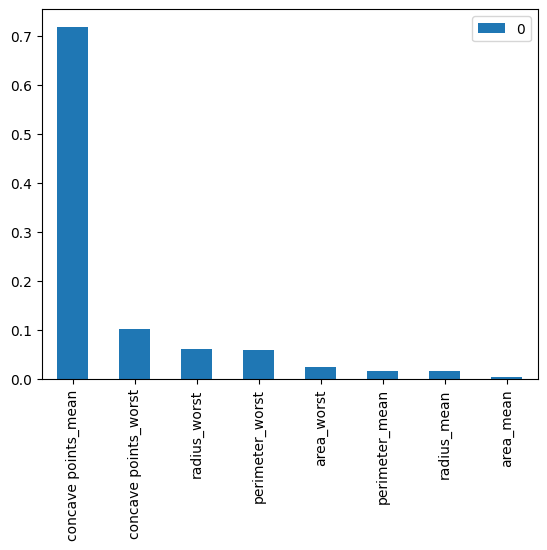

In [18]:
dt_model = DecisionTreeClassifier()
#dt_model.get_params()
#criterion: Gini/Entropy (default: Gini)
#splitter: best/random (default: Best)
#max_depth: N (default:None)
#random_state: N (default:None)
dt_model.fit(X_train, y_train)
#features = list(feature_importance[0]>0].index)
feature_importances = pd.DataFrame(dt_model.feature_importances_,index=X.columns).sort_values(by=0,ascending=False)
feature_importances.head(10).plot(kind='bar')
plt.show()

# plot_tree(dt_model,
#            feature_names=X.columns,
#            class_names={0:'M',1:'B'},
#            filled=True,
#            fontsize=12
#            )
#plt.show()

In [19]:
text_representation = export_text(dt_model)
print(text_representation)

|--- feature_3 <= 0.05
|   |--- feature_4 <= 16.83
|   |   |--- feature_2 <= 696.25
|   |   |   |--- feature_7 <= 0.14
|   |   |   |   |--- feature_7 <= 0.09
|   |   |   |   |   |--- feature_3 <= 0.03
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  0.03
|   |   |   |   |   |   |--- feature_7 <= 0.08
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_7 >  0.08
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  0.09
|   |   |   |   |   |--- feature_7 <= 0.09
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_7 >  0.09
|   |   |   |   |   |   |--- feature_3 <= 0.02
|   |   |   |   |   |   |   |--- feature_1 <= 71.01
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  71.01
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_3 >  0.02
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  0.14
|   |   | 

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

In [ ]:
svc_model = SVC(kernel='rbf',decision_function_shape='ovo')
#kernel options: linear, rbf, polynomial, sigmoid tanh
#decision_function_shape='ovo' means one vs one classifiers / one vs rest classifiers
svc_model.fit(X_train, y_train)

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

In [ ]:
models = {'dt_model':dt_model,
 'rf_model':rf_model,
'svc_model':svc_model,
'nb_model':nb_model,
'knn_model':knn_model}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    model_accuracies[model_name] = accuracy*100
    model_precision[model_name] = precision*100
    model_recall[model_name] = recall*100
    model_f1[model_name] = f1*100

acc = pd.DataFrame.from_dict(model_accuracies, orient='Index', columns=['Accuracy'])
prec = pd.DataFrame.from_dict(model_precision, orient='Index', columns=['Precision'])
rec = pd.DataFrame.from_dict(model_recall, orient='Index', columns=['Recall'])
f1 = pd.DataFrame.from_dict(model_f1, orient='Index', columns=['F1_Score'])
report = pd.concat([acc, prec, rec, f1], axis=1, join='inner')
report

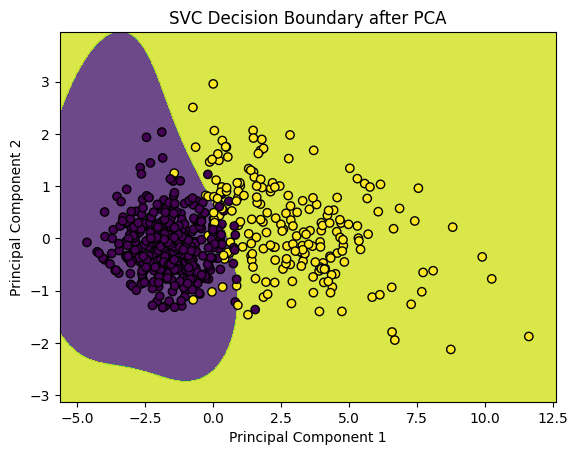

Explained variance ratio: [0.910203   0.06277045]
Cumulative explained variance ratio: [0.910203   0.97297345]


array([[69,  2],
       [ 4, 39]], dtype=int64)

In [22]:
svc_rbf_model = SVC(kernel='rbf',decision_function_shape='ovo')
#kernel options: linear, rbf, polynomial, sigmoid tanh
#decision_function_shape='ovo' means one vs one classifiers / one vs rest classifiers
svc_rbf_model.fit(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Create a PCA instance
pca = PCA(n_components=2)
# Fit PCA to the scaled data
pca.fit(X_scaled)
# Transform the data to the new feature space
X_pca = pca.transform(X_scaled)


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svc_rbf_model.fit(X_train, y_train)
svc_pred = svc_rbf_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test,y_pred)
# f1 = f1_score(y_test,y_pred)

# Plot decision boundary in the reduced feature space
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svc_rbf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, marker='o', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVC Decision Boundary after PCA')
plt.show()

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
# Print cumulative explained variance ratio
print("Cumulative explained variance ratio:", pca.explained_variance_ratio_.cumsum())


confusion_matrix(y_test, svc_pred, labels=[0,1])

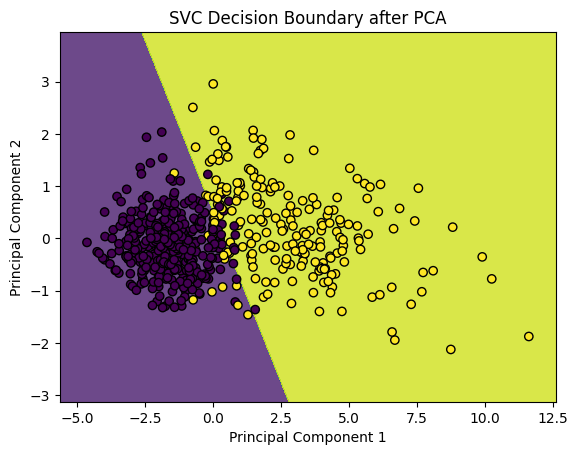

Explained variance ratio: [0.910203   0.06277045]
Cumulative explained variance ratio: [0.910203   0.97297345]


array([[69,  2],
       [ 4, 39]], dtype=int64)

In [23]:
svc_linear_model = SVC(kernel='linear',decision_function_shape='ovo')
#kernel options: linear, rbf, polynomial, sigmoid tanh
#decision_function_shape='ovo' means one vs one classifiers / one vs rest classifiers
svc_linear_model.fit(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Create a PCA instance
pca = PCA(n_components=2)
# Fit PCA to the scaled data
pca.fit(X_scaled)
# Transform the data to the new feature space
X_pca = pca.transform(X_scaled)


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svc_linear_model.fit(X_train, y_train)
svc_pred = svc_linear_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test,y_pred)
# f1 = f1_score(y_test,y_pred)

# Plot decision boundary in the reduced feature space
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svc_linear_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, marker='o', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVC Decision Boundary after PCA')
plt.show()

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
# Print cumulative explained variance ratio
print("Cumulative explained variance ratio:", pca.explained_variance_ratio_.cumsum())


confusion_matrix(y_test, svc_pred, labels=[0,1])

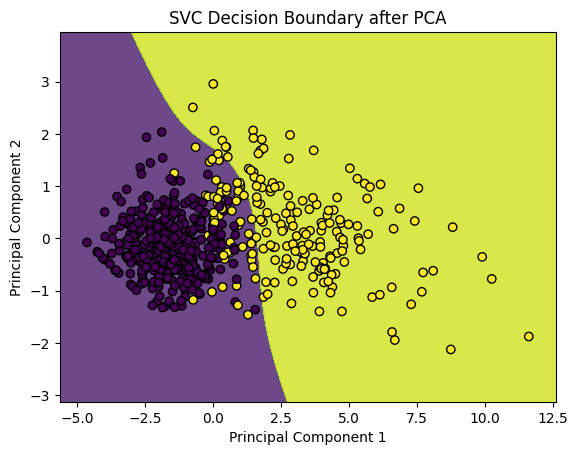

Explained variance ratio: [0.910203   0.06277045]
Cumulative explained variance ratio: [0.910203   0.97297345]


array([[71,  0],
       [12, 31]], dtype=int64)

In [25]:
svc_poly_model = SVC(kernel='poly',decision_function_shape='ovo')
#kernel options: linear, rbf, polynomial, sigmoid tanh
#decision_function_shape='ovo' means one vs one classifiers / one vs rest classifiers
svc_poly_model.fit(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Create a PCA instance
pca = PCA(n_components=2)
# Fit PCA to the scaled data
pca.fit(X_scaled)
# Transform the data to the new feature space
X_pca = pca.transform(X_scaled)


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svc_poly_model.fit(X_train, y_train)
svc_pred = svc_poly_model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test,y_pred)
# f1 = f1_score(y_test,y_pred)

# Plot decision boundary in the reduced feature space
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svc_poly_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, marker='o', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVC Decision Boundary after PCA')
plt.show()

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
# Print cumulative explained variance ratio
print("Cumulative explained variance ratio:", pca.explained_variance_ratio_.cumsum())


confusion_matrix(y_test, svc_pred, labels=[0,1])